**Libraries**

In [1]:
import os
import cv2
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

**Image Preparation**

In [2]:
def load_custom_dataset(dataset_path):
    images = []
    labels = []
    for label in range(10):
        folder_path = os.path.join(dataset_path, str(label))
        for filename in os.listdir(folder_path):
            image_path = os.path.join(folder_path, filename)
            images.append(preprocess_image(image_path))
            labels.append(label)
        print(f"Label {label}: Done!")
    return np.array(images), np.array(labels)

def preprocess_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    resized_image = cv2.resize(image, (8, 8))
    return resized_image.flatten()

**Loading Dataset**

In [3]:
dataset_path = "E:/Quera/AI_Project/Train"
X, y = load_custom_dataset(dataset_path)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Label 0: Done!
Label 1: Done!
Label 2: Done!
Label 3: Done!
Label 4: Done!
Label 5: Done!
Label 6: Done!
Label 7: Done!
Label 8: Done!
Label 9: Done!


**Implement Support Vector Machine (SVM) Algorithm**

In [4]:
# Using Support Vector Machine (SVM) classifier
clf = svm.SVC()
clf.fit(X_train_scaled, y_train)

# Predictions
y_pred = clf.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"SVM Accuracy: {accuracy}")

SVM Accuracy: 0.989002199560088


**NEURAL NETWORK**

In [5]:
# Convert labels to one-hot encoding
y_train_categorical = to_categorical(y_train, num_classes = 10)
y_test_categorical = to_categorical(y_test, num_classes = 10)

# Build a simple neural network
model = Sequential()
model.add(Dense(64, input_dim = 64, activation = "relu"))
model.add(Dense(32, activation = "relu"))
model.add(Dense(10, activation = "softmax"))

# Compile the model
model.compile(optimizer = Adam(), loss = "categorical_crossentropy", metrics = ["accuracy"])

# Train the model
epochs = 10
for epoch in range(epochs):
    history = model.fit(X_train_scaled, y_train_categorical, epochs = 1, batch_size = 32, validation_data = (X_test_scaled, y_test_categorical))

    # Print accuracy and loss
    print(f"Epoch {epoch + 1}/{epochs} - Accuracy: {history.history['accuracy'][0]}, Loss: {history.history['loss'][0]}")




2501/2501 [==============================] - 11s 4ms/step - loss: 0.1477 - accuracy: 0.9562 - val_loss: 0.0543 - val_accuracy: 0.9826
Epoch 1/10 - Accuracy: 0.9562087655067444, Loss: 0.14765648543834686
2501/2501 [==============================] - 4s 2ms/step - loss: 0.0458 - accuracy: 0.9848 - val_loss: 0.0487 - val_accuracy: 0.9840
Epoch 2/10 - Accuracy: 0.9848280549049377, Loss: 0.04578060284256935
2501/2501 [==============================] - 4s 2ms/step - loss: 0.0365 - accuracy: 0.9880 - val_loss: 0.0392 - val_accuracy: 0.9868
Epoch 3/10 - Accuracy: 0.9880273938179016, Loss: 0.03649420291185379
2501/2501 [==============================] - 4s 2ms/step - loss: 0.0320 - accuracy: 0.9889 - val_loss: 0.0412 - val_accuracy: 0.9861
Epoch 4/10 - Accuracy: 0.9888522028923035, Loss: 0.03198624774813652
2501/2501 [==============================] - 4s 2ms/step - loss: 0.0288 - accuracy: 0.9901 - val_loss: 0.0411 - val_accuracy: 0.9875
Epoch 5/10 - Accuracy: 0.9901394844055176, Loss: 0.0288

**Visualization**

1/1 [==============================] - 0s 43ms/step


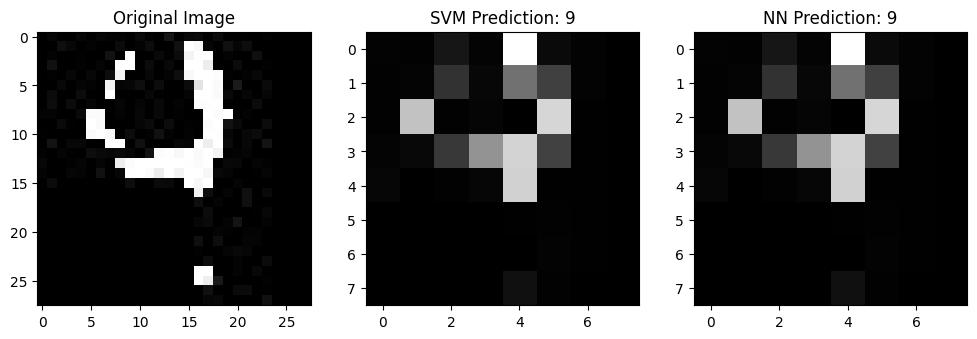

In [17]:
def visualize_prediction(image_path):
    # Load and preprocess the image
    test_image = preprocess_image(image_path)
    test_image_scaled = scaler.transform([test_image])

    # SVM prediction
    svm_prediction = clf.predict(test_image_scaled)[0]

    # Neural network prediction
    nn_prediction = np.argmax(model.predict(test_image_scaled))

    # Original image
    original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Plot three images side by side
    plt.figure(figsize = (12, 4))
    
    plt.subplot(1, 3, 1)
    plt.imshow(original_image, cmap = "gray")
    plt.title("Original Image")

    plt.subplot(1, 3, 2)
    plt.imshow(test_image.reshape(8, 8), cmap = "gray")
    plt.title(f"SVM Prediction: {svm_prediction}")

    plt.subplot(1, 3, 3)
    plt.imshow(test_image.reshape(8, 8), cmap = "gray")
    plt.title(f"NN Prediction: {nn_prediction}")

    plt.show()

# Example usage
image_to_predict = "D:/image_10513.jpg"
visualize_prediction(image_to_predict)